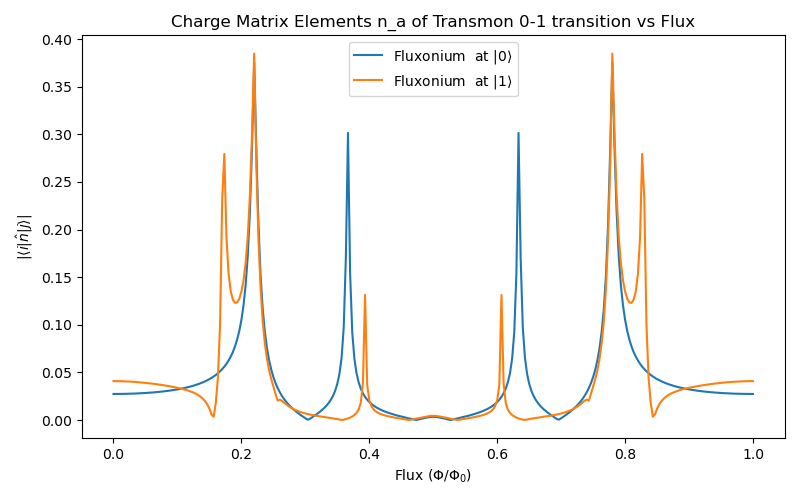

In [2]:
%matplotlib widget
import scqubits as scq
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

# Sweep flux from 0 to 1
flux_vals = np.linspace(0, 1, 301)
n_a_00_01_list = []
n_a_10_11_list = []
n_a_00_01_list = []

# Fixed parameters
ECa, EJa, ELa = 1.0617, 4.19, 0.933
ECb, EJb = 0.1845, 19.98
cutoff, trunc = 110, 12

for flux in flux_vals:
    # Create qubits at this flux
    qbta = scq.Fluxonium(EC=ECa, EJ=EJa, EL=ELa, flux=flux, cutoff=cutoff, truncated_dim=trunc)
    qbtb = scq.Transmon(EJ=EJb, EC=ECb, ng=0, ncut=cutoff, truncated_dim=trunc)

    hilbertspace = scq.HilbertSpace([qbta, qbtb])
    hilbertspace.add_interaction(
        g_strength=0.0222, op1=qbta.n_operator, op2=qbtb.n_operator,
    )
    hilbertspace.generate_lookup()

    # --- Truncate operators ---
    total_truncation = 15
    def truncate(operator, dimension): return qt.Qobj(operator[:dimension, :dimension])
    n_a = truncate(hilbertspace.op_in_dressed_eigenbasis(qbta.n_operator), total_truncation)
    n_b = truncate(hilbertspace.op_in_dressed_eigenbasis(qbtb.n_operator), total_truncation)
    (evals,) = hilbertspace["evals"]
    diag_dressed_hamiltonian_trunc = truncate(
        2 * np.pi * qt.Qobj(np.diag(evals), dims=[hilbertspace.subsystem_dims]*2),
        total_truncation
    )


    # --- Get dressed indices for |11> and |10> ---
    def get_idx(state_tuple):
        return hilbertspace.dressed_index(state_tuple)

    idx_11 = get_idx((1,1))
    idx_10 = get_idx((1,0))
    idx_00 = get_idx((0, 0))
    idx_01 = get_idx((0, 1))
    # Matrix elements (absolute value)
    n_a_10_11 = abs(n_a[idx_11, idx_10])  # <(1,1)|n_a|(1,0)>
    n_a_00_01 = abs(n_a[idx_01, idx_00]) # <(0,1)|n_a|(0,0)>
    
    n_a_00_01_list.append(n_a_00_01)
    n_a_10_11_list.append(n_a_10_11)


plt.figure(figsize=(8,5))
plt.plot(flux_vals, n_a_00_01_list, label=r'Fluxonium  at $|0\rangle$')
plt.plot(flux_vals, n_a_10_11_list, label=r'Fluxonium  at $|1\rangle$')
plt.xlabel('Flux ($\Phi/\Phi_0$)')
plt.ylabel(r'$|\langle i|\hat{n}|j\rangle|$')
plt.title('Charge Matrix Elements n_a of Transmon 0-1 transition vs Flux')
plt.legend()
plt.tight_layout()
plt.show()

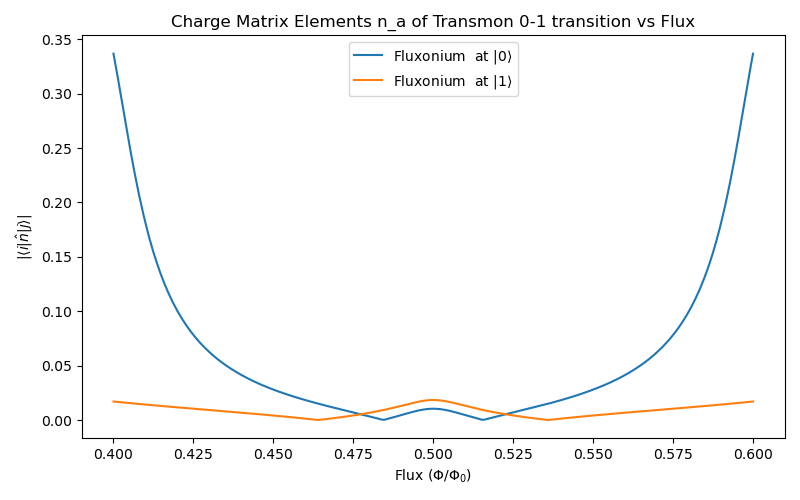

In [6]:
%matplotlib widget
import scqubits as scq
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import json

# --- Load parameter set from JSON ---
with open("cr_params.json", "r") as f:
    param_sets = json.load(f)

# Choose which set to use
params = param_sets["CR_set2"]

# Assign parameters
ECa = params["fluxonium"]["EC"]
EJa = params["fluxonium"]["EJ"]
ELa = params["fluxonium"]["EL"]
ECb = params["transmon"]["EC"]
EJb = params["transmon"]["EJ"]
Jc = params["Jc"]
A = params["A"]

# Sweep flux from 0 to 1
flux_vals = np.linspace(0.4, .6, 301)
n_a_00_01_list = []
n_a_10_11_list = []

cutoff, trunc = 110, 12

for flux in flux_vals:
    qbta = scq.Fluxonium(EC=ECa, EJ=EJa, EL=ELa, flux=flux, cutoff=cutoff, truncated_dim=trunc)
    qbtb = scq.Transmon(EJ=EJb, EC=ECb, ng=0, ncut=cutoff, truncated_dim=trunc)

    hilbertspace = scq.HilbertSpace([qbta, qbtb])
    hilbertspace.add_interaction(
        g_strength=Jc, op1=qbta.n_operator, op2=qbtb.n_operator,
    )
    hilbertspace.generate_lookup()

    # --- Truncate operators ---
    total_truncation = 15
    import qutip as qt
    def truncate(operator, dimension): return qt.Qobj(operator[:dimension, :dimension])
    n_a = truncate(hilbertspace.op_in_dressed_eigenbasis(qbta.n_operator), total_truncation)
    n_b = truncate(hilbertspace.op_in_dressed_eigenbasis(qbtb.n_operator), total_truncation)
    (evals,) = hilbertspace["evals"]
    diag_dressed_hamiltonian_trunc = truncate(
        2 * np.pi * qt.Qobj(np.diag(evals), dims=[hilbertspace.subsystem_dims]*2),
        total_truncation
    )

    def get_idx(state_tuple):
        return hilbertspace.dressed_index(state_tuple)

    idx_11 = get_idx((1,1))
    idx_10 = get_idx((1,0))
    idx_00 = get_idx((0, 0))
    idx_01 = get_idx((0, 1))
    n_a_10_11 = abs(n_a[idx_11, idx_10])
    n_a_00_01 = abs(n_a[idx_01, idx_00])
    n_a_00_01_list.append(n_a_00_01)
    n_a_10_11_list.append(n_a_10_11)

plt.figure(figsize=(8,5))
plt.plot(flux_vals, n_a_00_01_list, label=r'Fluxonium  at $|0\rangle$')
plt.plot(flux_vals, n_a_10_11_list, label=r'Fluxonium  at $|1\rangle$')
plt.xlabel('Flux ($\Phi/\Phi_0$)')
plt.ylabel(r'$|\langle i|\hat{n}|j\rangle|$')
plt.title('Charge Matrix Elements n_a of Transmon 0-1 transition vs Flux')
plt.legend()
plt.tight_layout()
plt.show()